<a href="https://colab.research.google.com/github/nolll77/haberman-dataset-exploratory/blob/master/exploratory_data_analysis_on_haberman_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on Haberman dataset**

Haberman's dataset contains case studies of the survaival of patients who had undergone surgery for breast cancer.
This case study was conducted in University of Chicago’s Billings Hospital between 1957 and 1970

## Attribute Information
- Age of patient at time of operation (numerical)
- Patient’s year of operation (year — 1900, numerical)
- Number of positive auxillary nodes detected (numerical)
- Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

### Importing modules

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Reading the csv file

In [59]:
# Auth from my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
haberman = pd.read_csv("/content/drive/My Drive/Dataset/Jovian/Haberman/datasets_181140_407023_haberman.csv")
#printing the first 5 rows
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


## Data Summary

In [61]:
haberman.shape

(306, 4)

The dataset contain 306 rows and 4 columns

In [62]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

The column names are age, year, nodes and status

In [63]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


### **Observations**
- There are 306 entries and there is no null value in any of it
- The status is given as an integer, it is not making much sense as its value is 1 and 2.
- We can change the value to 'yes' if the patient survived after 5 years and 'no' if not survived

In [64]:
#changing the 1 in status as Yes and 2 in status as No
haberman['status'] = haberman['status'].map({1:'Yes', 2:'No'})
haberman.head()

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [65]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [66]:
print(haberman['year'].value_counts())

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64


In [67]:
print(haberman['status'].value_counts())

Yes    225
No      81
Name: status, dtype: int64


### **Observation**
- Patients between age 30 and 83 had undergone the surgery. The average age of the patient is 52
- The data set contain details of operations between 1958 and 1969. Maximum operations happenned on 1958 which was 36. The year 1969 has minumum number of operations which was 11.
- The number of positive auxilarry nodes varies between 0 and 52. On an average, 4 positive auxilary nodes were seen in patients.
- Out of the 306 patients who underwent the surgery, 81 died within a span of 5 years and 225 died after 5 years
- As the number of patients that survived and not differ drastically this dataset is not balanced

In [68]:
#dataframe having patient information whose status is yes
survived = haberman[haberman['status'] == 'Yes']
survived.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [69]:
#dataframe having patient information whose status is no
notSurvived = haberman[haberman['status'] == 'No']
notSurvived.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### **Observation**
* The survived group had less number of average auxilary nodes compared to those who didnt survive
* Average age of the group that survived and didnt survive are approximatly same

## Univariate analysis

### Probability density function

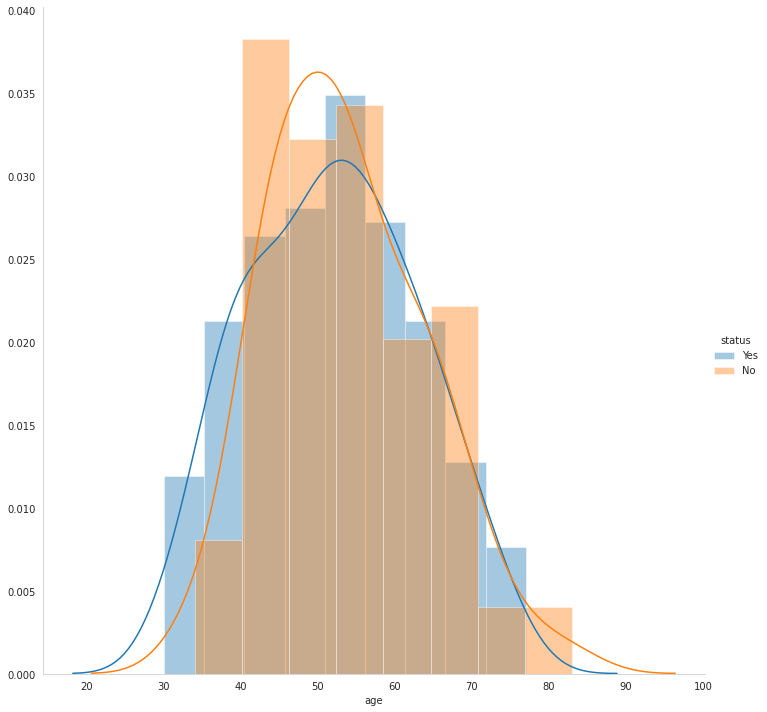

In [70]:
sns.FacetGrid(haberman,hue='status',height = 10)\
 .map(sns.distplot,'age')\
 . add_legend();
plt.grid()
plt.show()

### **Observation**
* Patients who underwent the operations between 30 to 34 has more chance of survival
* Patients who underwent the operations between 78 to 82 has very less chance of survival 
* Most of the patiets in the age group 40 to 45 had died in less than 5 years 
* Most of the patients in the age group 51 to 56 had survived more than 5 years
* There is overlap between both groups which indicates that survival rate is not fully related to the age

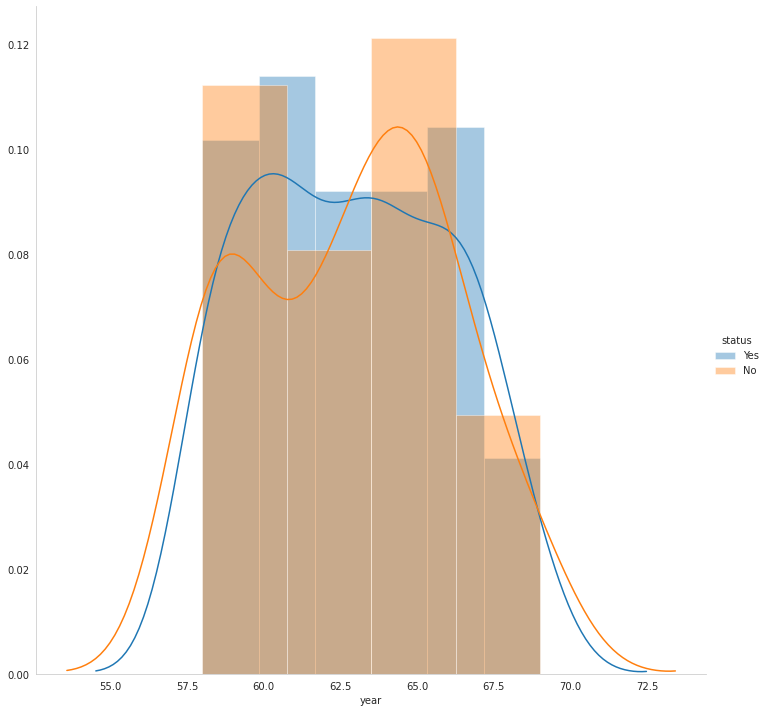

In [71]:
sns.FacetGrid(haberman,hue='status',height = 10)\
 .map(sns.distplot,'year')\
 . add_legend();
plt.grid()
plt.show()

### **Observation**
* Both graphs are completly overlapped. So the survival rate is independent of year of operation.
* More failure is seen between 1963 and 1966
* More survival rate is seen between 1959 and 1961

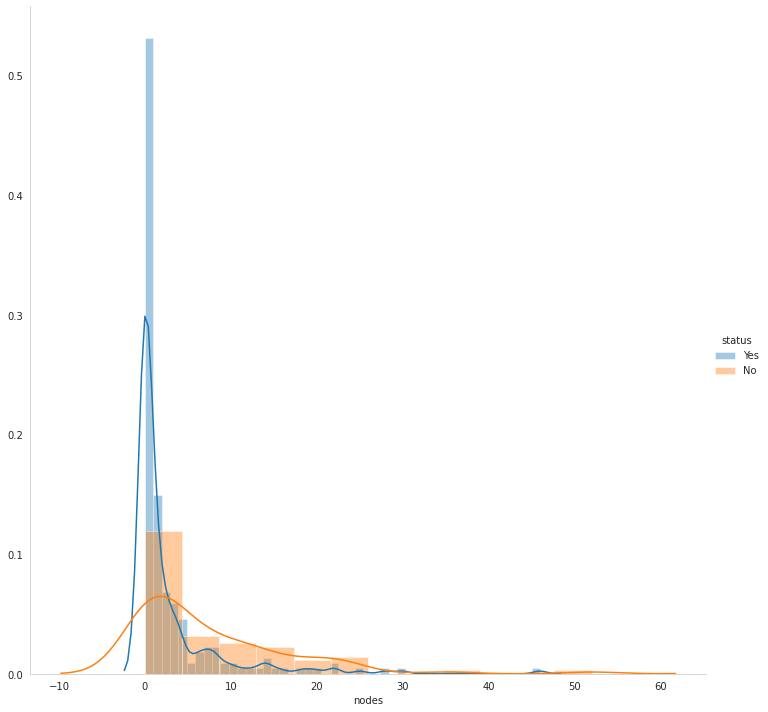

In [72]:
sns.FacetGrid(haberman,hue='status',height = 10)\
 .map(sns.distplot,'nodes')\
 . add_legend();
plt.grid()
plt.show()

### **Observation**
    * Patients with zero one or two nodes had the highest chance of survival
    * As the number of nodes increases, the chance of survival decreases drastically
    * Patients who had very high number of nodes say more than 50, have very less chance of survival

### Cumulative Distribution Function(CDF)

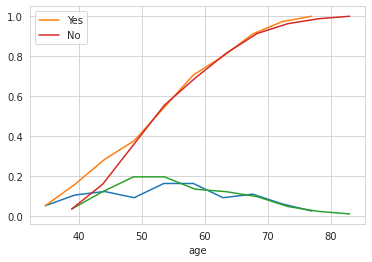

In [73]:
counts1, bin_edges1 = np.histogram(survived['age'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
#print(pdf1);
#print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('age')
counts2, bin_edges2 = np.histogram(notSurvived['age'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
#print(pdf2);
#print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('age')
plt.legend()
plt.show()

### **Observations**
- For people younger than ~48 years, the probablity of survival after 5 years is higher
- The survival probablity is same as non survival probablity for people aged between 48 and 70.

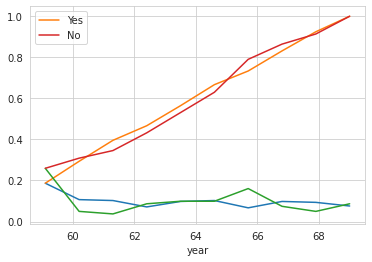

In [74]:
counts1, bin_edges1 = np.histogram(survived['year'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
#print(pdf1);
#print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('year')
counts2, bin_edges2 = np.histogram(notSurvived['year'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
#print(pdf2);
#print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('year')
plt.legend()
plt.show()

### **Observation**
- From 1958 -1960 and from 1965 - 1967 the probablity of people survived after 5 years was less than probablity of people died with in 5 years
- For operations conducted between 1961 - 1965 the probablity of people survived after 5 years was more than probablity of people died with in 5 years
- After 1967, the probablity of people survived after 5 years was same as the probablity of people died with in 5 years

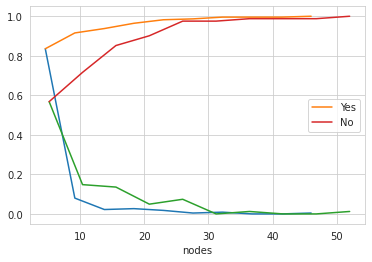

In [75]:
counts1, bin_edges1 = np.histogram(survived['nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
#print(pdf1);
#print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')
counts2, bin_edges2 = np.histogram(notSurvived['nodes'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
#print(pdf2);
#print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.show()

### **Observations**
- If the number of positive auxilary nodes was less than 25, the probablity of people survived after 5 years was more than probablity of people died with in 5 years

### Box plots

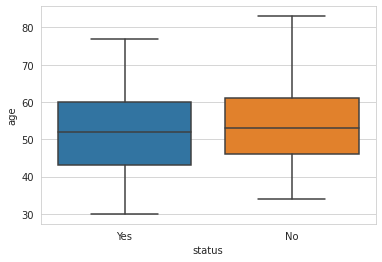

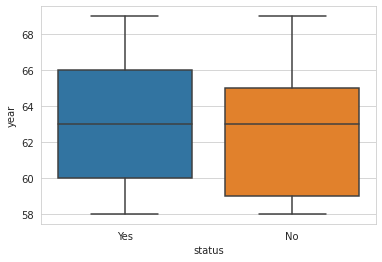

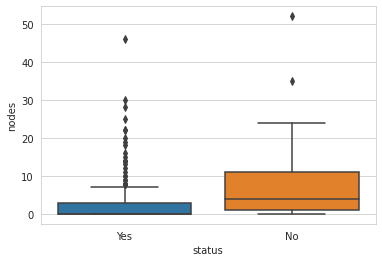

In [76]:
sns.boxplot(x='status',y='age',data=haberman)
plt.show()
sns.boxplot(x='status',y='year',data=haberman)
plt.show()
sns.boxplot(x='status',y='nodes',data=haberman)
plt.show()

### **Observation**
- For the box plot of age vs status and year vs status, the 50th percentile value is more or less same.
- For the box plot of nodes vs status, we can see that the 75th percentile of people survived more than 5 years is less than the 50 th percentile of people died with in 5 years.
- Most of the survived people has the node count less than 4.

### Violin plots

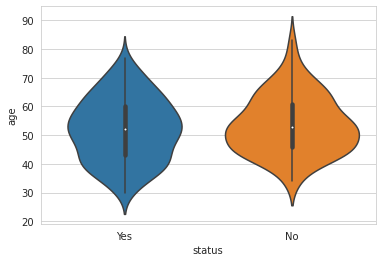

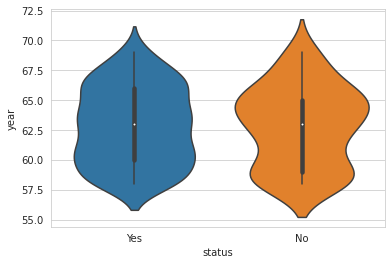

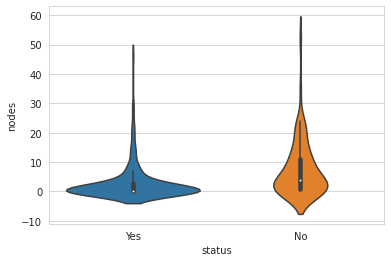

In [77]:
sns.violinplot(x='status',y='age',data = haberman,height = 10)
plt.show()
sns.violinplot(x='status',y='year',data = haberman,height = 10)
plt.show()
sns.violinplot(x='status',y='nodes',data = haberman,height = 10)
plt.show()

### **Observation**
- Most of the survived people has the very less node count. 

## Bi-Variate analysis

### Scatter Plots

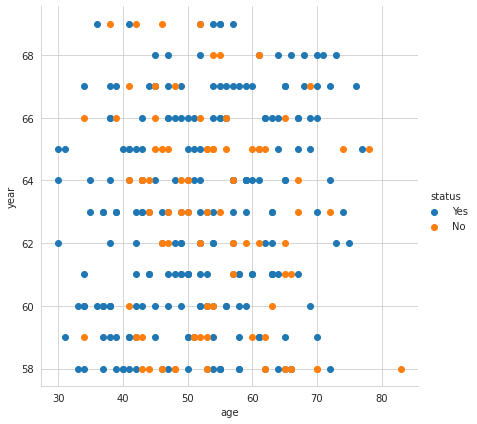

In [78]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'status' , height = 6)\
 .map(plt.scatter,'age','year')\
 .add_legend()
plt.show()

## **Observations**
- For age groups between 30-40, and 70 - 80 the survival of people after 5 years of operation is more.

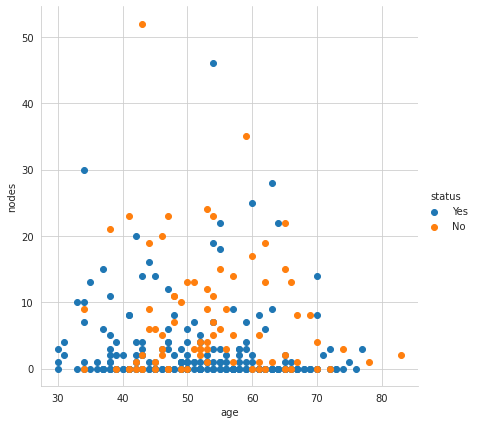

In [79]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'status' , height = 6)\
 .map(plt.scatter,'age','nodes')\
 .add_legend()
plt.show()

### **Observations**
- For age group 30 - 40, the survival of people after 5 years of operation is more.

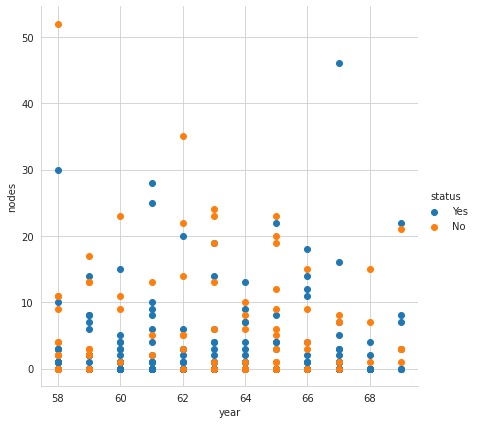

In [80]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'status' , height = 6)\
 .map(plt.scatter,'year','nodes')\
 .add_legend()
plt.show()

### **Observation**
- As the data in the nodes vs year plot is scatterred, it not giving much information.

### Pair plots

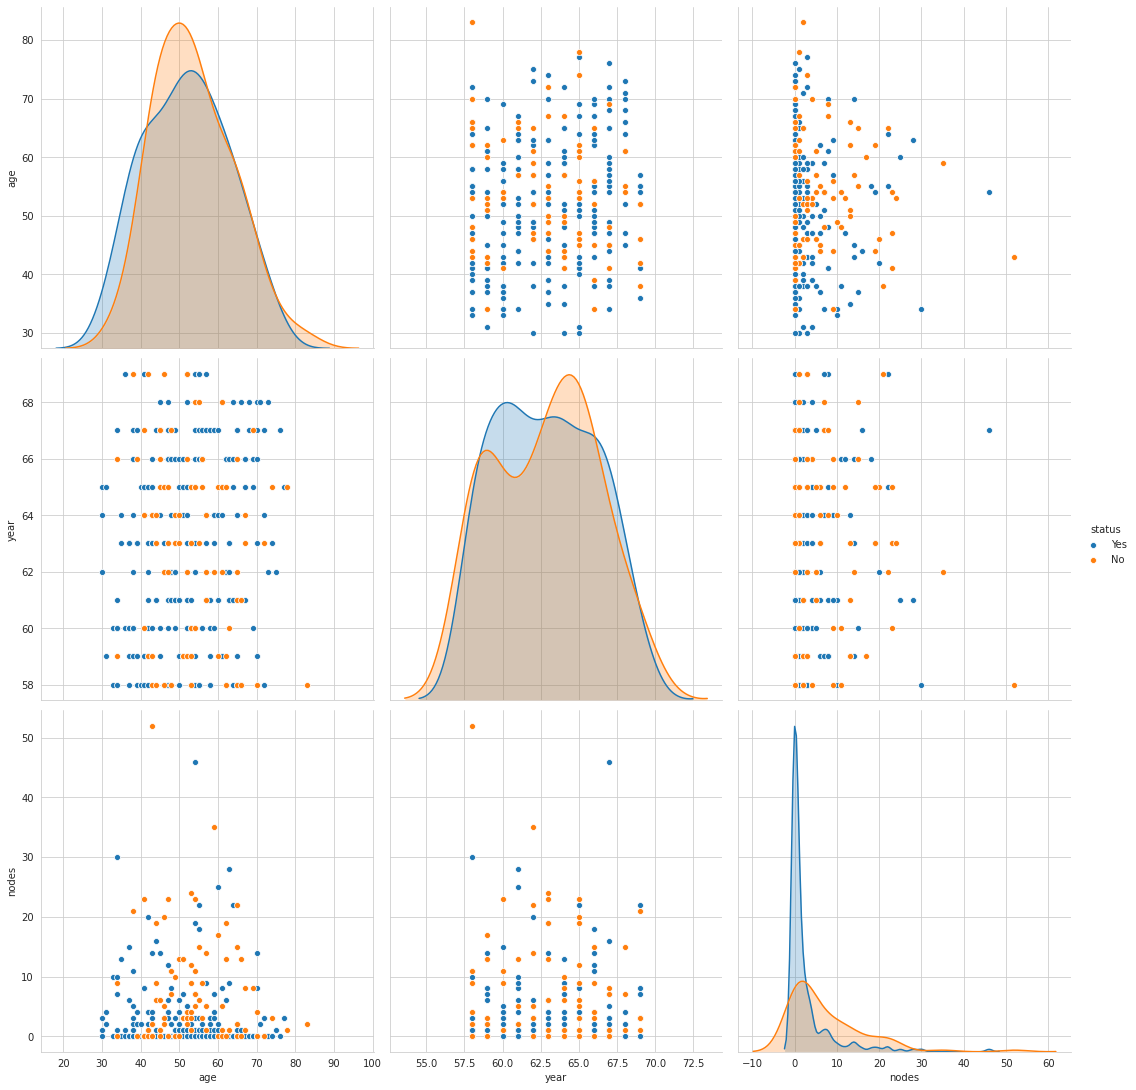

In [81]:
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='status', height = 5)
plt.show()

## **Observations**
- For age groups between 30-40, and 70 - 80 the survival of people after 5 years of operation is more.
- For age group 30 - 40, the survival of people after 5 years of operation is more.
- Patients with zero one or two nodes had the highest chance of survival
- As the number of nodes increases, the chance of survival decreases drastically
- Patients who had very high number of nodes say more than 50, have very less chance of survival

## Multivariate analysis

### Contour Plot

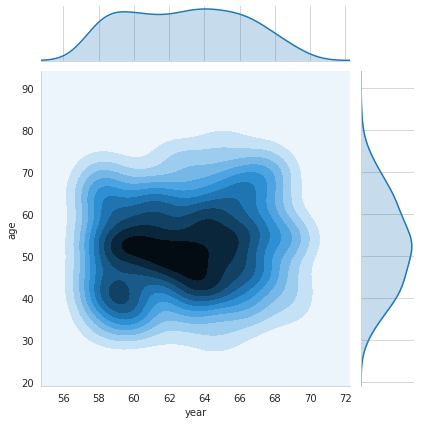

In [82]:
sns.jointplot(x = 'year', y = 'age', data = haberman, kind = 'kde')
plt.show()

### **Summary**
- More operations occured during 1960 and 1965
- Patients aged between 45 and 60 did most operations

## Conclusions of exploratory data analysis
- Patients younger that 35 has very high chance of survival. Up to 48 years, the probablity of survival after 5 years is more.
- The survival probablity is more or less same as non survival probablity for people aged between 48 and 70.
- Survival has a relationship on the number of auxillary nodes. Patients having less auxilary nodes have higher chance of survival than patients having high number of auxilary nodes.
- From 1958 -1960 and from 1965 - 1967 the probablity of people survived after 5 years was less than probablity of people died with in 5 years
- For operations conducted between 1961 - 1965 the probablity of people survived after 5 years was more than probablity of people died with in 5 years
- Data set is imbalanced